In [1]:
import pandas as pd
import io
import numpy as np

Read the following matrix from a CSV file or JSON file

In [2]:
from google.colab import files
 
print('Please upload the csv file named \'hw3-file.csv\'')
uploaded = files.upload()

Please upload the csv file named 'hw3-file.csv'


Saving hw3-file.csv to hw3-file (5).csv


In [3]:
# replace the file path if not using Google Colab
# reading '-' as NaN
df = pd.read_csv(io.BytesIO(uploaded['hw3-file.csv']), na_values='-')
print(df)
df.head()

           Where Found  Requirement  Analysis  Design  Coding  Unit Testing  \
0          Requirement           79       NaN     NaN     NaN           NaN   
1             Analysis           18      32.0     NaN     NaN           NaN   
2               Design           17      17.0    93.0     NaN           NaN   
3               Coding           36      19.0    55.0   388.0           NaN   
4         Unit Testing           12      43.0     8.0   156.0          38.0   
5  Integration Testing           17      15.0     7.0    32.0           NaN   
6       System Testing           24      39.0    57.0    41.0           NaN   
7                Field            3       4.0     6.0     7.0           NaN   

   Integration Testing  System Testing  Field  
0                  NaN             NaN    NaN  
1                  NaN             NaN    NaN  
2                  NaN             NaN    NaN  
3                  NaN             NaN    NaN  
4                  NaN             NaN    NaN  


,Where Found,Requirement,Analysis,Design,Coding,Unit Testing,Integration Testing,System Testing,Field
0,Requirement,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Analysis,18,32.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Design,17,17.0,93.0,NaN,NaN,NaN,NaN,NaN
3,Coding,36,19.0,55.0,388.0,NaN,NaN,NaN,NaN
4,Unit Testing,12,43.0,8.0,156.0,38.0,NaN,NaN,NaN


Create functions to calculate the defect removal effectiveness for every phase and for the entire process

In [4]:
# defects injected
injected = df.sum(axis=0, numeric_only=True)

# defects removed
removed = df.sum(axis=1, numeric_only=True)

In [5]:
def dre(df, injected, removed):
  # defects existing on entry step
  existing = [0]
  for i in range(0,len(injected)-1):
    existing.append(float((existing[i] + injected[i] - removed[i])))

  # replace the number for testing phases with defects in current + subsequent phases
  # this is for easier calculation later
  for i in range(4,8):
    existing[i] = sum(removed[i:8])

  # print(existing)

  col_names = df.columns
  testing = [None] * 9

  # calculation of DRE (%)
  for i in range(1,5):
    col = col_names[i]
    testing[i] = removed[i-1]/(existing[i-1]+injected[i-1]) * 100
    print(col, round(testing[i],2), '%')

  for i in range(5,9):
    col = col_names[i]
    testing[i] = removed[i-1] / existing[i-1] * 100
    print(col, round(testing[i],2), '%')

In [6]:
def overall_dre(df, removed):
  overall = (1-(removed[7])/sum(removed)) * 100
  print(round(overall,2), '%')

In [7]:
print('DRE:')
dre(df, injected, removed)

print('Overall DRE:')
overall_dre(df, removed)

DRE:
Requirement 38.35 %
Analysis 16.89 %
Design 26.91 %
Coding 51.39 %
Unit Testing 49.52 %
Integration Testing 27.86 %
System Testing 86.77 %
Field 100.0 %
Overall DRE:
98.04 %


Create a stacked bar chart to plot the counts (y-axis) of the defects detection phase for the origination phases (X-axis)

In [8]:
import matplotlib.pyplot as plt

In [9]:
df.head()

,Where Found,Requirement,Analysis,Design,Coding,Unit Testing,Integration Testing,System Testing,Field
0,Requirement,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Analysis,18,32.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Design,17,17.0,93.0,NaN,NaN,NaN,NaN,NaN
3,Coding,36,19.0,55.0,388.0,NaN,NaN,NaN,NaN
4,Unit Testing,12,43.0,8.0,156.0,38.0,NaN,NaN,NaN


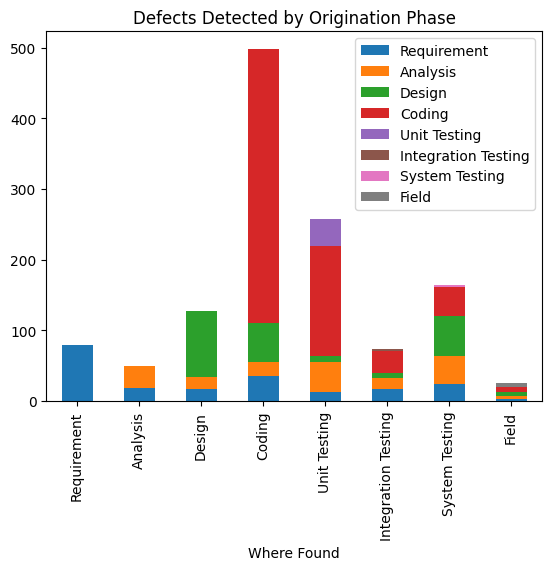

In [10]:
df.plot(x='Where Found', kind='bar', stacked=True, title='Defects Detected by Origination Phase')
plt.show()